In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
import time
import importlib
import sys
sys.path.append('..')

import GaussianODEs as ode
import GaussianAlgorithms as algo
importlib.reload(ode)
importlib.reload(algo)

<module 'GaussianAlgorithms' from '/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianAlgorithms.py'>

In [2]:
mu = 20
sigma = 0.1
mu0 = 0
sigma0 = 1

## WFR

In [3]:
Niter = 400
gamma = 0.01
mean_eq_wfr, var_eq_wfr, kl_wfrinf = ode.wfr_infinite_time(mu0, mu, sigma0, sigma, Niter, gamma)

In [4]:
N = 1000
X0 = np.random.normal(size = N)

In [5]:
x, W = algo.SMC_WFR(gamma, Niter, mu, sigma, mu0, sigma0, X0)

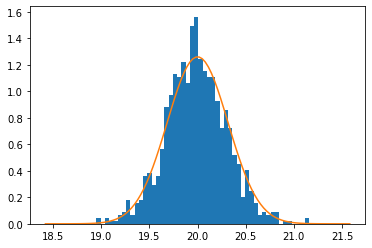

In [6]:
plt.hist(x[-1, :], density = True, weights = W[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [7]:
mean_smc = np.zeros(Niter)
var_smc = np.zeros(Niter)
kl_smc = np.zeros(Niter)
for i in range(Niter):
    mean_smc[i] = np.sum(x[i, :]*W[i, :])
    var_smc[i] = np.sum(x[i, :]**2*W[i, :]) - mean_smc[i]**2
    kl_smc[i] = ode.KL(mean_smc[i], var_smc[i], mu, sigma)

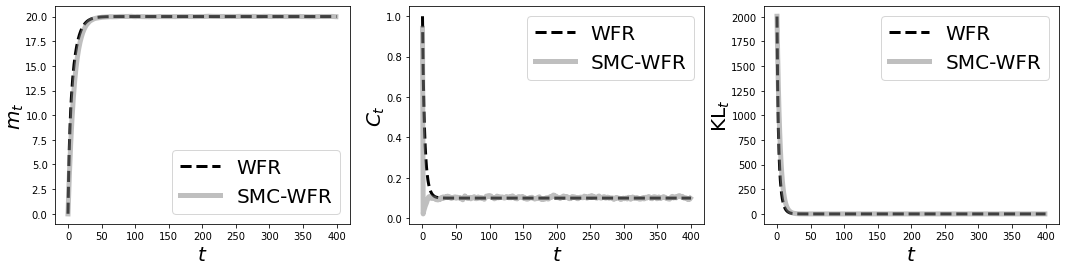

In [8]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.plot(mean_eq_wfr, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(mean_smc, label = 'SMC-WFR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$m_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
plt.subplot(1, 3, 2)
plt.plot(var_eq_wfr, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(var_smc, label = 'SMC-WFR', color = 'gray', alpha = 0.5, lw = 5)
plt.legend(fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$C_t$', fontsize = 20, labelpad=-1)
plt.subplot(1, 3, 3)
plt.plot(kl_wfrinf, label = 'WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(kl_smc, label = 'SMC-WFR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('KL$_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
# plt.savefig('SMC_WFR_gaussian.pdf', bbox_inches="tight")

## Unit time FR

In [9]:
mean_eq_fr, var_eq_fr, kl_fr = ode.fisherrao_infinite_time(mu0, mu, sigma0, sigma, Niter, gamma)

In [10]:
xSMC, WSMC = algo.SMC_UnitFR(Niter, mu, sigma, mu0, sigma0, X0, gamma)

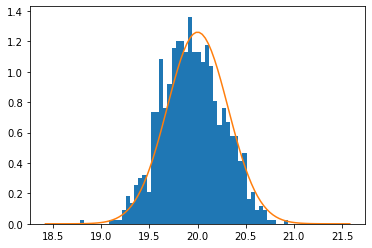

In [11]:
plt.hist(xSMC[-1, :], density = True, weights = WSMC[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [12]:
mean_smc = np.zeros(Niter)
var_smc = np.zeros(Niter)
kl_smc = np.zeros(Niter)
for i in range(Niter):
    mean_smc[i] = np.sum(xSMC[i, :]*WSMC[i, :])
    var_smc[i] = np.sum(xSMC[i, :]**2*WSMC[i, :]) - mean_smc[i]**2
    kl_smc[i] = ode.KL(mean_smc[i], var_smc[i], mu, sigma)

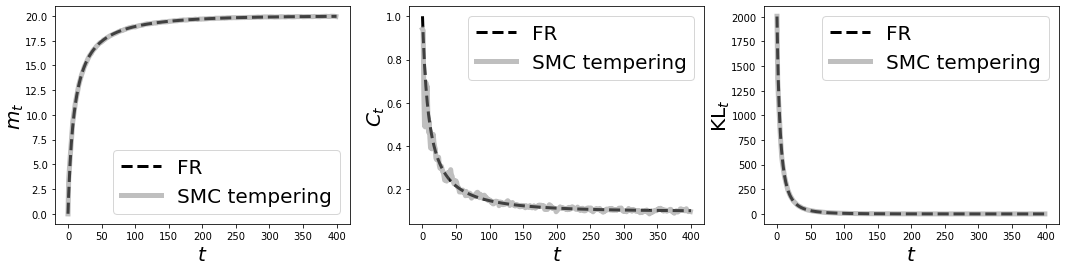

In [21]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.plot(mean_eq_fr, label = 'FR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(mean_smc, label = 'SMC tempering', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$m_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
plt.subplot(1, 3, 2)
plt.plot(var_eq_fr, label = 'FR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(var_smc, label = 'SMC tempering', color = 'gray', alpha = 0.5, lw = 5)
plt.legend(fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$C_t$', fontsize = 20, labelpad=-1)
plt.subplot(1, 3, 3)
plt.plot(kl_fr, label = 'FR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(kl_smc, label = 'SMC tempering', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('KL$_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
# plt.savefig('SMC_FR_gaussian.pdf', bbox_inches="tight")

## Tempered WFR

In [14]:
lseq_linear = np.arange(1, Niter+1)/Niter
mean_eq_twfr, var_eq_twfr, kl_twfr = ode.tempered_wfr_infinite_time(mu0, mu, sigma0, sigma, Niter, gamma, lseq_linear)

In [15]:
delta_linear = (gamma+np.exp(-gamma)-1)/gamma

In [16]:
x, W = algo.SMC_TWFR(gamma, Niter, mu, sigma, mu0, sigma0, X0, lseq_linear, delta_linear)

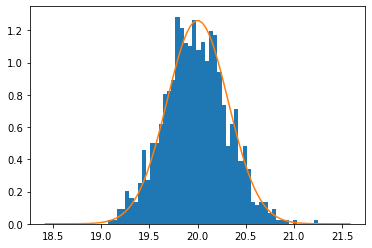

In [17]:
plt.hist(x[-1, :], density = True, weights = W[-1, :], bins = 50)
plt.plot(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), norm.pdf(np.linspace(mu-5*np.sqrt(sigma), mu+5*np.sqrt(sigma), 100), scale = np.sqrt(sigma), loc = mu))

In [18]:
mean_smc = np.zeros(Niter)
var_smc = np.zeros(Niter)
kl_smc = np.zeros(Niter)
for i in range(Niter):
    mean_smc[i] = np.sum(xSMC[i, :]*WSMC[i, :])
    var_smc[i] = np.sum(xSMC[i, :]**2*WSMC[i, :]) - mean_smc[i]**2
    kl_smc[i] = ode.KL(mean_smc[i], var_smc[i], mu, sigma)

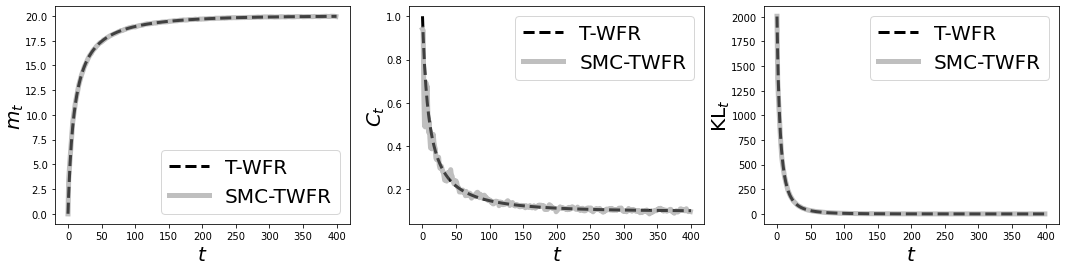

In [19]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.plot(mean_eq_fr, label = 'T-WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(mean_smc, label = 'SMC-TWFR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$m_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
plt.subplot(1, 3, 2)
plt.plot(var_eq_fr, label = 'T-WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(var_smc, label = 'SMC-TWFR', color = 'gray', alpha = 0.5, lw = 5)
plt.legend(fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$C_t$', fontsize = 20, labelpad=-1)
plt.subplot(1, 3, 3)
plt.plot(kl_fr, label = 'T-WFR', linestyle = 'dashed', lw = 3, color = 'black')
plt.plot(kl_smc, label = 'SMC-TWFR', color = 'gray', alpha = 0.5, lw = 5)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('KL$_t$', fontsize = 20, labelpad=-1)
plt.legend(fontsize = 20)
# plt.savefig('SMC_TWFR_gaussian.pdf', bbox_inches="tight")